# Keras TF 2.0

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

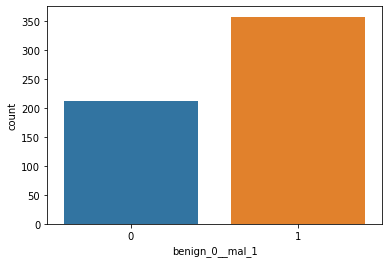

In [14]:
sns.countplot(x='benign_0__mal_1', data=df)

In [15]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [17]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

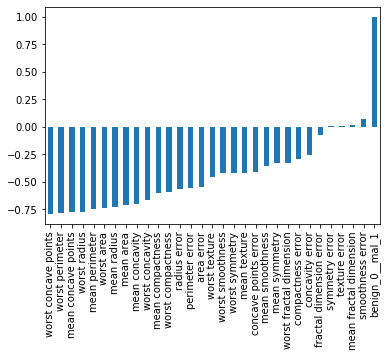

In [19]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

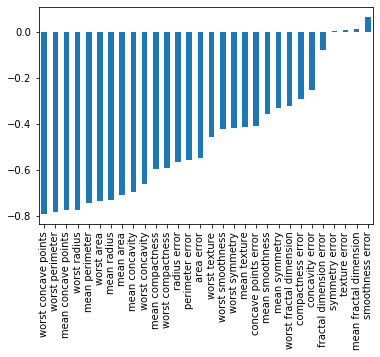

In [20]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

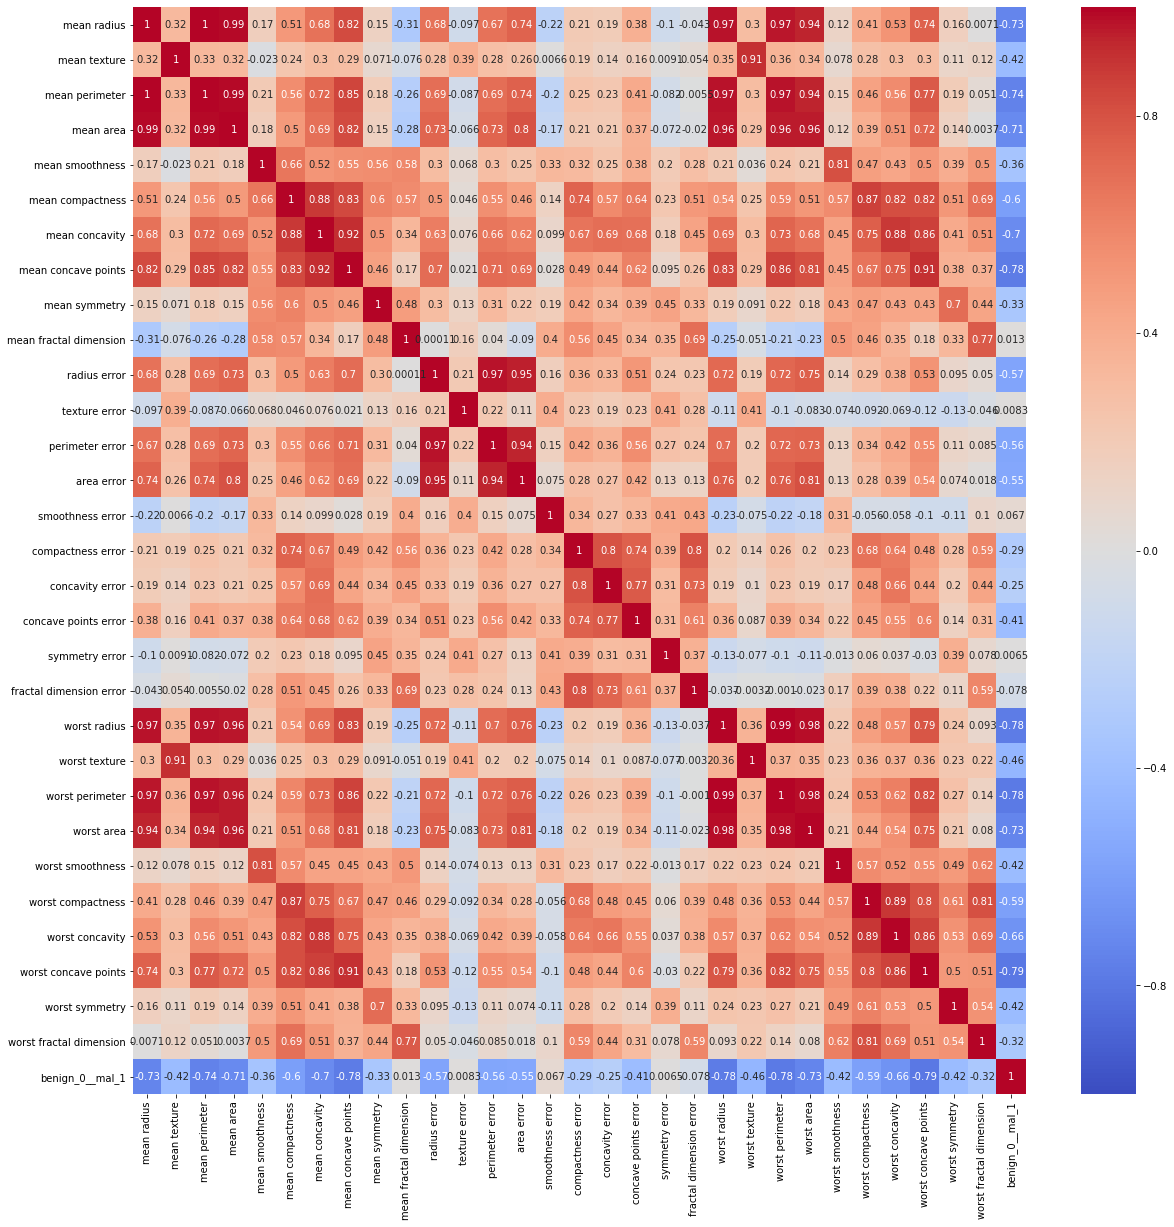

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [27]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [28]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Dense, Dropout

In [44]:
X_train.shape

(426, 30)

In [46]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6928 - val_loss: 0.6716
Epoch 2/600
426/426 [==============================] - 0s 239us/sample - loss: 0.6501 - val_loss: 0.6351
Epoch 3/600
426/426 [==============================] - 0s 258us/sample - loss: 0.6123 - val_loss: 0.6010
Epoch 4/600
426/426 [==============================] - 0s 247us/sample - loss: 0.5738 - val_loss: 0.5618
Epoch 5/600
426/426 [==============================] - 0s 261us/sample - loss: 0.5304 - val_loss: 0.5165
Epoch 6/600
426/426 [==============================] - 0s 518us/sample - loss: 0.4841 - val_loss: 0.4691
Epoch 7/600
426/426 [==============================] - 0s 488us/sample - loss: 0.4377 - val_loss: 0.4205
Epoch 8/600
426/426 [==============================] - 0s 413us/sample - loss: 0.3921 - val_loss: 0.3737
Epoch 9/600
426/426 [==============================] - 0s 371us/sample - loss: 0.3499 - val_loss: 0.3322
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0592 - val_loss: 0.1213
Epoch 79/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0565 - val_loss: 0.1161
Epoch 80/600
426/426 [==============================] - 0s 299us/sample - loss: 0.0548 - val_loss: 0.1225
Epoch 81/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0525 - val_loss: 0.1216
Epoch 82/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0514 - val_loss: 0.1149
Epoch 83/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0566 - val_loss: 0.1247
Epoch 84/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0510 - val_loss: 0.1143
Epoch 85/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0588 - val_loss: 0.1388
Epoch 86/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0531 - val_loss: 0.1171
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 387us/sample - loss: 0.0447 - val_loss: 0.1261
Epoch 156/600
426/426 [==============================] - 0s 265us/sample - loss: 0.0432 - val_loss: 0.1266
Epoch 157/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0401 - val_loss: 0.1278
Epoch 158/600
426/426 [==============================] - 0s 354us/sample - loss: 0.0396 - val_loss: 0.1172
Epoch 159/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0387 - val_loss: 0.1273
Epoch 160/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0391 - val_loss: 0.1206
Epoch 161/600
426/426 [==============================] - 0s 404us/sample - loss: 0.0395 - val_loss: 0.1186
Epoch 162/600
426/426 [==============================] - 0s 294us/sample - loss: 0.0398 - val_loss: 0.1299
Epoch 163/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0427 - val_loss: 0.1309
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 183us/sample - loss: 0.0247 - val_loss: 0.1227
Epoch 308/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0260 - val_loss: 0.1292
Epoch 309/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0275 - val_loss: 0.1134
Epoch 310/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0247 - val_loss: 0.1330
Epoch 311/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0259 - val_loss: 0.1156
Epoch 312/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0244 - val_loss: 0.1248
Epoch 313/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0246 - val_loss: 0.1285
Epoch 314/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0231 - val_loss: 0.1134
Epoch 315/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0241 - val_loss: 0.1321
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 174us/sample - loss: 0.0159 - val_loss: 0.1276
Epoch 460/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0208 - val_loss: 0.1172
Epoch 461/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0142 - val_loss: 0.1255
Epoch 462/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0173 - val_loss: 0.1261
Epoch 463/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0354 - val_loss: 0.1150
Epoch 464/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0204 - val_loss: 0.1566
Epoch 465/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0181 - val_loss: 0.1130
Epoch 466/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0205 - val_loss: 0.1350
Epoch 467/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0151 - val_loss: 0.1244
Epoch 468/600
426/426 [============================

In [48]:
losses = pd.DataFrame(model.history.history)

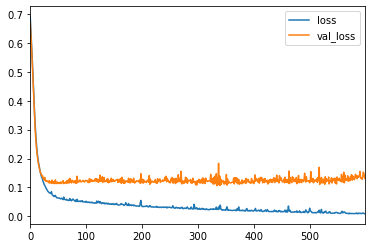

In [49]:
losses.plot()

In [50]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [53]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6745 - val_loss: 0.6667
Epoch 2/600
426/426 [==============================] - 0s 393us/sample - loss: 0.6487 - val_loss: 0.6393
Epoch 3/600
426/426 [==============================] - 0s 289us/sample - loss: 0.6230 - val_loss: 0.6112
Epoch 4/600
426/426 [==============================] - 0s 263us/sample - loss: 0.5919 - val_loss: 0.5810
Epoch 5/600
426/426 [==============================] - 0s 282us/sample - loss: 0.5570 - val_loss: 0.5369
Epoch 6/600
426/426 [==============================] - 0s 302us/sample - loss: 0.5023 - val_loss: 0.4804
Epoch 7/600
426/426 [==============================] - 0s 348us/sample - loss: 0.4513 - val_loss: 0.4295
Epoch 8/600
426/426 [==============================] - 0s 267us/sample - loss: 0.4055 - val_loss: 0.3853
Epoch 9/600
426/426 [==============================] - 0s 241us/sample - loss: 0.3665 - val_loss: 0.3456
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 308us/sample - loss: 0.0546 - val_loss: 0.1025
Epoch 79/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0547 - val_loss: 0.1005
Epoch 80/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0541 - val_loss: 0.1062
Epoch 81/600
426/426 [==============================] - 0s 218us/sample - loss: 0.0532 - val_loss: 0.1007
Epoch 82/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0538 - val_loss: 0.1048
Epoch 83/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0522 - val_loss: 0.1017
Epoch 84/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0512 - val_loss: 0.1010
Epoch 85/600
426/426 [==============================] - 0s 263us/sample - loss: 0.0524 - val_loss: 0.1029
Epoch 00085: early stopping


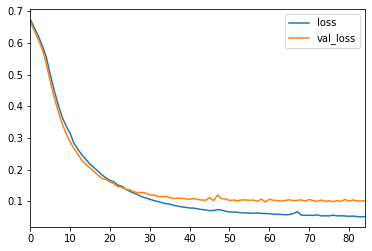

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [56]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 4s 10ms/sample - loss: 0.7031 - val_loss: 0.6631
Epoch 2/600
426/426 [==============================] - 0s 355us/sample - loss: 0.6894 - val_loss: 0.6467
Epoch 3/600
426/426 [==============================] - 0s 254us/sample - loss: 0.6670 - val_loss: 0.6336
Epoch 4/600
426/426 [==============================] - 0s 292us/sample - loss: 0.6395 - val_loss: 0.6191
Epoch 5/600
426/426 [==============================] - 0s 261us/sample - loss: 0.6449 - val_loss: 0.6000
Epoch 6/600
426/426 [==============================] - 0s 351us/sample - loss: 0.6115 - val_loss: 0.5783
Epoch 7/600
426/426 [==============================] - 0s 319us/sample - loss: 0.5991 - val_loss: 0.5536
Epoch 8/600
426/426 [==============================] - 0s 354us/sample - loss: 0.5784 - val_loss: 0.5277
Epoch 9/600
426/426 [==============================] - 0s 315us/sample - loss: 0.5603 - val_loss: 0.5051
Epoch 10/6

Epoch 78/600
426/426 [==============================] - 0s 275us/sample - loss: 0.1329 - val_loss: 0.1052
Epoch 79/600
426/426 [==============================] - 0s 414us/sample - loss: 0.1225 - val_loss: 0.1084
Epoch 80/600
426/426 [==============================] - 0s 293us/sample - loss: 0.1150 - val_loss: 0.1216
Epoch 81/600
426/426 [==============================] - 0s 289us/sample - loss: 0.1279 - val_loss: 0.1071
Epoch 82/600
426/426 [==============================] - 0s 244us/sample - loss: 0.1098 - val_loss: 0.1084
Epoch 83/600
426/426 [==============================] - 0s 242us/sample - loss: 0.1408 - val_loss: 0.1139
Epoch 84/600
426/426 [==============================] - 0s 229us/sample - loss: 0.1248 - val_loss: 0.1136
Epoch 85/600
426/426 [==============================] - 0s 279us/sample - loss: 0.1028 - val_loss: 0.1065
Epoch 86/600
426/426 [==============================] - 0s 233us/sample - loss: 0.1058 - val_loss: 0.1023
Epoch 87/600
426/426 [========================

In [58]:
model_loss = pd.DataFrame(model.history.history)

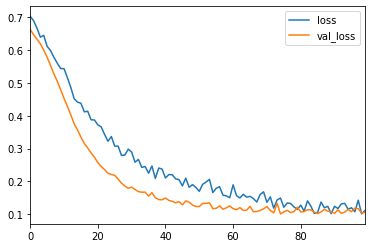

In [60]:
model_loss.plot()

In [62]:
predictions = model.predict_classes(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.97      0.98      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [65]:
print(confusion_matrix(y_test, predictions))

[[52  3]
 [ 2 86]]
